### Tugas Praktikum

In [ ]:
import pandas as pd
df_voice = pd.read_csv('/content/drive/MyDrive/SEMESTER 5/ML/voice (1).csv')
df_voice.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import pandas as pd


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_voice['label_enc'] = le.fit_transform(df_voice['label'])

X = df_voice.drop(columns=['label', 'label_enc'])
y = df_voice['label_enc']


In [ ]:
# SVM dengan Split 70:30 dan 80:20 (Linear, Poly, RBF)


results = []

splits = [(0.3, "70:30"), (0.2, "80:20")]
kernels = ["linear", "poly", "rbf"]

for test_size, split_name in splits:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42, stratify=y
    )

    for kernel in kernels:
        model = SVC(kernel=kernel)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)

        results.append({
            "Split": split_name,
            "Kernel": kernel,
            "Accuracy": acc
        })

results_df = pd.DataFrame(results)
results_df


,Split,Kernel,Accuracy
0,70:30,linear,0.920084
1,70:30,poly,0.511041
2,70:30,rbf,0.695058
3,80:20,linear,0.917981
4,80:20,poly,0.517350
5,80:20,rbf,0.694006


In [ ]:
results_df.sort_values(by="Accuracy", ascending=False)


,Split,Kernel,Accuracy
0,70:30,linear,0.920084
3,80:20,linear,0.917981
2,70:30,rbf,0.695058
5,80:20,rbf,0.694006
4,80:20,poly,0.517350
1,70:30,poly,0.511041


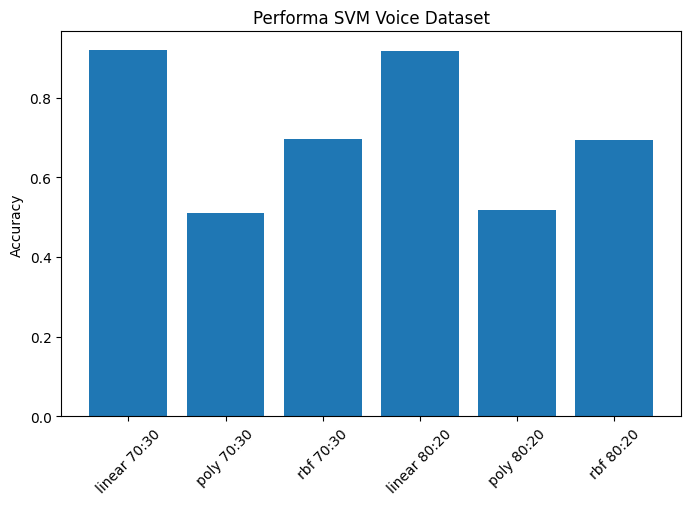

In [ ]:
# visualisasi grafik akurasi

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(results_df['Kernel'] + " " + results_df['Split'], results_df['Accuracy'])
plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.title("Performa SVM Voice Dataset")
plt.show()


## Tugas prak 5 (nomor 2)

In [ ]:
train_dir = "/content/dataset/images/training"
test_dir  = "/content/dataset/images/test"


In [ ]:
# Combine train and test averaged brightness data into a single DataFrame df_p5
df_p5 = pd.concat([train_avg_img, test_avg_img], ignore_index=True)

target_column_p5 = 'LABELS'

# Pisahkan antara Fitur (X) dan Target (y)
X_p5 = df_p5.drop(target_column_p5, axis=1)
y_p5 = df_p5[target_column_p5]

print("Fitur (X) P5 berhasil dipisah:")
print(X_p5.head())
print("\nTarget (y) P5 berhasil dipisah:")
print(y_p5.head())

Fitur (X) P5 berhasil dipisah:
   AVG_BRIGHT
0  157.021297
1  158.018809
2  137.345858
3  143.662879
4  110.086635

Target (y) P5 berhasil dipisah:
0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: LABELS, dtype: float64


In [ ]:
# Split data 80:20 sesuai permintaan
X_train_p5, X_test_p5, y_train_p5, y_test_p5 = train_test_split(X_p5, y_p5, test_size=0.20, random_state=42)

print(f"Ukuran data latih P5: {X_train_p5.shape[0]}, Ukuran data tes P5: {X_test_p5.shape[0]}")

Ukuran data latih P5: 320, Ukuran data tes P5: 80


In [ ]:
# Membuat model RBF dengan parameter default (dasar)
model_rbf_p5_base = SVC(kernel='rbf')
model_rbf_p5_base.fit(X_train_p5, y_train_p5)

# Prediksi dan catat akurasi
y_pred_p5_base = model_rbf_p5_base.predict(X_test_p5)
acc_p5_base = accuracy_score(y_test_p5, y_pred_p5_base)

print(f"Akurasi Model RBF (Base/Default): {acc_p5_base:.4f}")

Akurasi Model RBF (Base/Default): 0.8500


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001]
}

print("Memulai Hyperparameter Tuning (GridSearch)... Ini mungkin butuh waktu...")
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5, verbose=1)
grid_search.fit(X_train_p5, y_train_p5)

print("\nTuning Selesai.")
print("Parameter RBF terbaik yang ditemukan:")
print(grid_search.best_params_)

Memulai Hyperparameter Tuning (GridSearch)... Ini mungkin butuh waktu...
Fitting 5 folds for each of 16 candidates, totalling 80 fits

Tuning Selesai.
Parameter RBF terbaik yang ditemukan:
{'C': 100, 'gamma': 0.1}


In [ ]:
model_terbaik_p5 = grid_search.best_estimator_
y_pred_p5_tuned = model_terbaik_p5.predict(X_test_p5)
acc_p5_tuned = accuracy_score(y_test_p5, y_pred_p5_tuned)

print("\n--- HASIL AKURASI TUGAS 2 (SIANG/MALAM) ---")
print(f"Akurasi RBF (Default): {acc_p5_base:.4f}")
print(f"Akurasi RBF (Hasil Tuning): {acc_p5_tuned:.4f}")


--- HASIL AKURASI TUGAS 2 (SIANG/MALAM) ---
Akurasi RBF (Default): 0.8500
Akurasi RBF (Hasil Tuning): 0.8750
